# Stock Price Predication

**Import Liberies**

In [7]:
!pip install quandl
import quandl

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
Stock_d = quandl.get("NSE/TATAGLOBAL")

In [10]:
Stock_d.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


**Visualize Data**

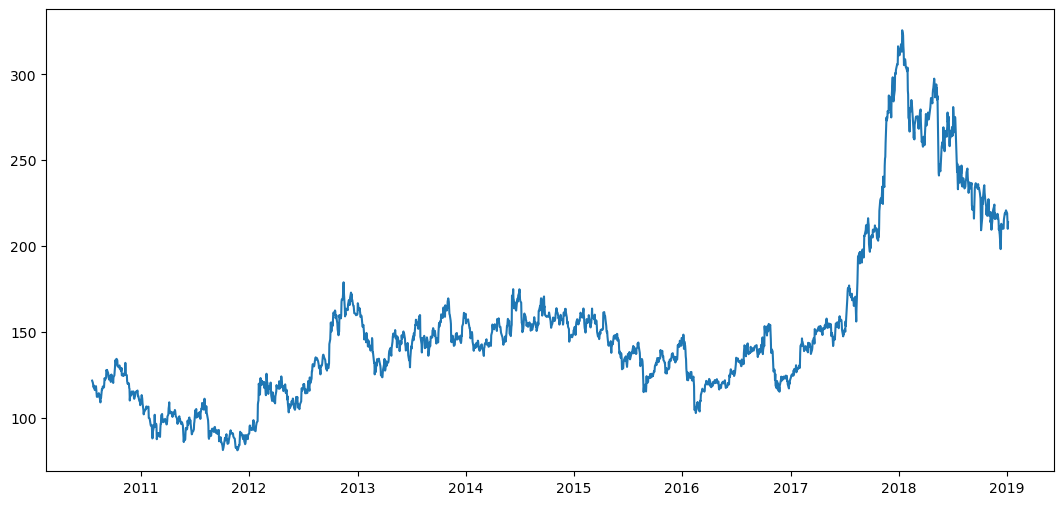

In [12]:
plt.figure(figsize=(13,6))
plt.plot(Stock_d['Close'] ,label= 'Closing Price')

In [13]:
Stock_d['Open - Close'] = Stock_d['Open'] - Stock_d['Close']
Stock_d['High - Low'] = Stock_d['High'] - Stock_d['Low']
Stock_d = Stock_d.dropna()

**Input Feature to predit wheather customer  should buy or sell**

In [15]:
X = Stock_d[['Open - Close' , 'High - Low']]

In [16]:
X.head(10)

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50
2010-07-28,-0.25,3.30
2010-07-29,-4.10,9.20
2010-07-30,0.45,3.40
2010-08-02,0.00,1.90


**Intention is to store +1 for a buy signal and -1 for sell signal**

In [18]:
Y = np.where(Stock_d['Close'].shift(-1)>Stock_d['Close'] ,1 ,-1)

In [19]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size = 0.25 , random_state=44)

**Implementation KNN classifier**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [24]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn , params , cv=5)

In [25]:
model.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

**Check Accuracy**

In [27]:
accuracy_train = accuracy_score(Y_train, model.predict(X_train))

In [28]:
print('accuracy_train : %.2f'%accuracy_train)

accuracy_train : 0.67


In [29]:
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

In [30]:
print('accuracy_test : %.2f ' %accuracy_test)

accuracy_test : 0.51 


In [31]:
predict_classification = model.predict(X_test)

In [32]:
actual_predict = pd.DataFrame({' Actual Class ' :Y_test , ' Predict Class ' :predict_classification})

In [33]:
actual_predict.head(10)

,Actual Class,Predict Class
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
5,-1,-1
6,-1,1
7,-1,-1
8,-1,1
9,1,-1


In [34]:
Y = Stock_d['Close']

In [35]:
Y.head(10)

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
2010-07-28    118.25
2010-07-29    116.60
2010-07-30    116.05
2010-08-02    117.30
2010-08-03    118.30
Name: Close, dtype: float64

**Implementation KNN Regression**

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [38]:
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, Y, test_size=0.2)

In [39]:
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# Initialize the KNN Regressor
knn_reg = KNeighborsRegressor()

# Set up GridSearchCV
model_reg = GridSearchCV(knn_reg, params, cv=5)

In [40]:
# Fit the model
model_reg.fit(X_train_reg, Y_train_reg)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [41]:
predicts = model_reg.predict(X_test_reg)

In [42]:
print(predicts)

[200.82666667 123.77       146.93       138.11333333 134.07333333
 131.25       136.48666667 139.20666667 145.06333333 136.81666667
 129.13666667 121.29666667 127.85       135.5        176.30666667
 176.30666667 212.73333333 141.91666667 130.97       165.74333333
 145.78666667 153.84333333 189.16333333 156.91666667 135.49333333
 153.73333333 159.22666667 138.56666667 162.81333333 177.99333333
 135.89666667 163.59333333 139.64333333 127.69666667 133.77
 174.27666667 118.01       133.20333333 152.98666667 133.39333333
 132.65333333 144.88666667 138.48333333 149.03       145.7
 135.95666667 143.15333333 164.48       180.03       150.94666667
 157.70666667 167.80666667 136.78       154.04333333 139.32
 176.76       132.53666667 214.95       197.39333333 139.64
 147.26666667 144.66333333 212.67333333 121.14       133.66666667
 153.52       229.16333333 131.19333333 140.81666667 133.47666667
 229.43333333 124.11666667 196.15333333 122.04       145.61666667
 191.84333333 119.53333333 223.5133

**Predict Model**

In [43]:
valid = pd.DataFrame({'Actual Close' :Y_test_reg , 'Predict close ' :predicts})

In [44]:
print(valid.head(10))

            Actual Close  Predict close 
Date                                    
2018-04-04        270.25      200.826667
2011-12-07         90.85      123.770000
2013-06-07        149.10      146.930000
2015-09-18        125.45      138.113333
2016-02-17        104.00      134.073333
2012-06-20        106.25      131.250000
2013-11-29        148.90      136.486667
2012-06-06        107.90      139.206667
2016-07-05        133.90      145.063333
2017-02-28        138.05      136.816667
